<a href="https://colab.research.google.com/github/EON-LEE/CLEANCODE_WITH_PYTHON/blob/master/pytorch_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://lmb.informatik.uni-freiburg.de/resources/datasets/bio/data/BMMCdata.tar.bz2 --no-check-certificate
!wget https://lmb.informatik.uni-freiburg.de/resources/datasets/bio/data/BMMCmasks.tar.bz2 --no-check-certificate

--2020-05-25 01:16:37--  https://lmb.informatik.uni-freiburg.de/resources/datasets/bio/data/BMMCdata.tar.bz2
Resolving lmb.informatik.uni-freiburg.de (lmb.informatik.uni-freiburg.de)... 132.230.167.23
Connecting to lmb.informatik.uni-freiburg.de (lmb.informatik.uni-freiburg.de)|132.230.167.23|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 34393518 (33M) [application/x-bzip2]
Saving to: ‘BMMCdata.tar.bz2’

BMMCdata.tar.bz2    100%[===================>]  32.80M  7.53MB/s    in 4.5s    

2020-05-25 01:16:41 (7.28 MB/s) - ‘BMMCdata.tar.bz2’ saved [34393518/34393518]

--2020-05-25 01:16:43--  https://lmb.informatik.uni-freiburg.de/resources/datasets/bio/data/BMMCmasks.tar.bz2
Resolving lmb.informatik.uni-freiburg.de (lmb.informatik.uni-freiburg.de)... 132.230.167.23
Connecting to lmb.informatik.uni-freiburg.de (lmb.informatik.uni-freiburg.de)|132.230.167.23|:443... connected.
  Unable to locally verify the issuer'

In [2]:
!ls

BMMCdata.tar.bz2  BMMCmasks.tar.bz2  sample_data


In [0]:
!bunzip2 BMMCdata.tar.bz2 BMMCmasks.tar.bz2

In [4]:
!ls

BMMCdata.tar  BMMCmasks.tar  sample_data


In [5]:
!tar -xvf BMMCdata.tar 
!tar -xvf BMMCmasks.tar

data/
data/BMMC_54.tif
data/BMMC_53.tif
data/BMMC_52.tif
data/BMMC_51.tif
data/BMMC_50.tif
data/BMMC_49.tif
data/BMMC_48.tif
data/BMMC_46.tif
data/BMMC_45.tif
data/BMMC_44.tif
data/BMMC_43.tif
data/BMMC_42.tif
data/BMMC_41.tif
data/BMMC_40.tif
data/BMMC_39.tif
data/BMMC_38.tif
data/BMMC_37.tif
data/BMMC_36.tif
data/BMMC_35.tif
data/BMMC_34.tif
data/BMMC_28.tif
data/BMMC_27.tif
data/BMMC_26.tif
data/BMMC_25.tif
data/BMMC_24.tif
data/BMMC_23.tif
data/BMMC_22.tif
data/BMMC_21.tif
data/BMMC_20.tif
data/BMMC_18.tif
data/BMMC_17.tif
data/BMMC_16.tif
data/BMMC_15.tif
data/BMMC_14.tif
data/BMMC_13.tif
data/BMMC_12.tif
data/BMMC_11.tif
data/BMMC_10.tif
data/BMMC_7.tif
data/BMMC_6.tif
data/BMMC_4.tif
data/BMMC_2.tif
data/BMMC_1.tif
masks/
masks/BMMC_7.tif_segmentation.tifnomalized.tif
masks/BMMC_6.tif_segmentation.tifnomalized.tif
masks/BMMC_54.tif_segmentation.tifnomalized.tif
masks/BMMC_53.tif_segmentation.tifnomalized.tif
masks/BMMC_52.tif_segmentation.tifnomalized.tif
masks/BMMC_51.tif_segme

In [6]:
!ls

BMMCdata.tar  BMMCmasks.tar  data  masks  sample_data


In [0]:
import torch
from torch.utils.data.dataset import Dataset  # For custom data-sets
from torchvision import transforms
from PIL import Image
import glob

folder_data = glob.glob("./data/*.tif")
folder_mask = glob.glob("./masks/*.tif")

len_data = len(folder_data)
train_size = 0.6

train_image_paths = folder_data[:int(len_data*train_size)]
test_image_paths = folder_data[int(len_data*train_size):]

train_mask_paths = folder_mask[:int(len_data*train_size)]
test_mask_paths = folder_mask[int(len_data*train_size):]

class CustomDataset(Dataset):
    def __init__(self, image_paths, target_paths, train=True):   

        self.image_paths = image_paths
        self.target_paths = target_paths
        self.transforms = transforms.ToTensor()

    def __getitem__(self, index):

        image = Image.open(self.image_paths[index])
        mask = Image.open(self.target_paths[index])
        t_image = self.transforms(image)
        return t_image, mask

    def __len__(self):  

        return len(self.image_paths)

train_dataset = CustomDataset(train_image_paths, train_mask_paths, train=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=False)

test_dataset = CustomDataset(test_image_paths, test_mask_paths, train=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

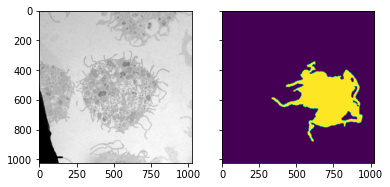

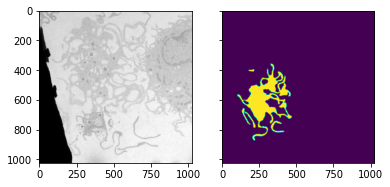

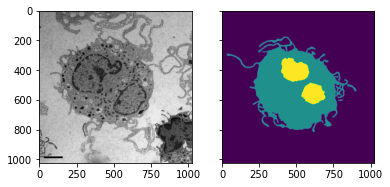

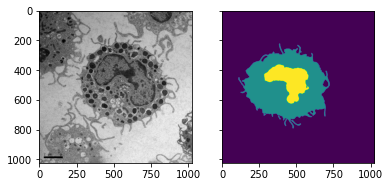

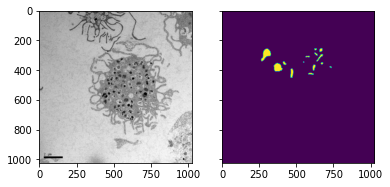

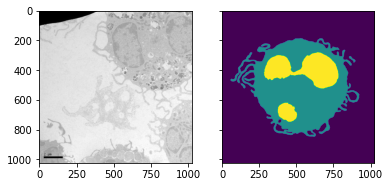

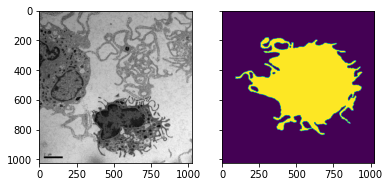

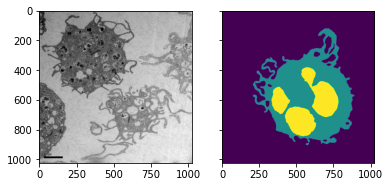

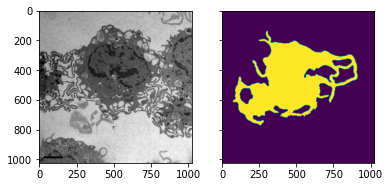

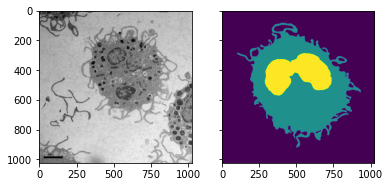

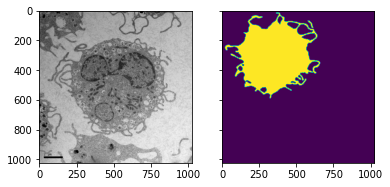

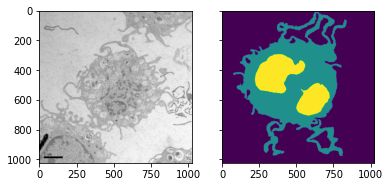

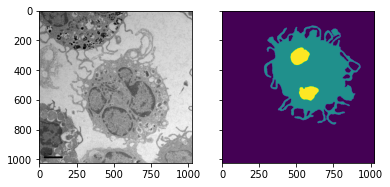

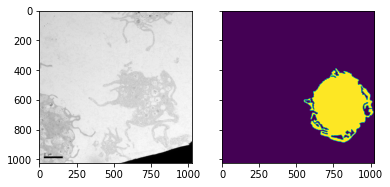

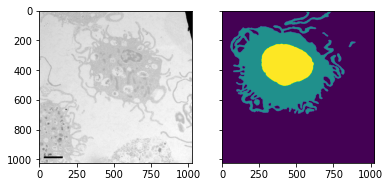

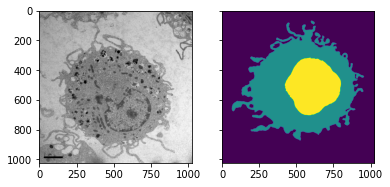

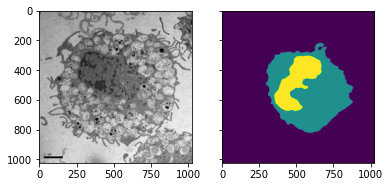

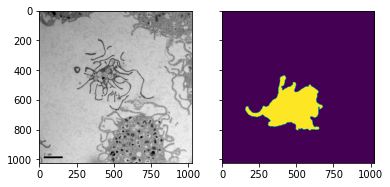

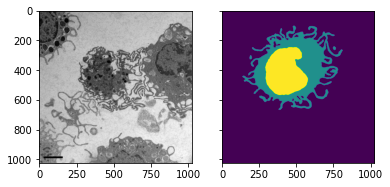

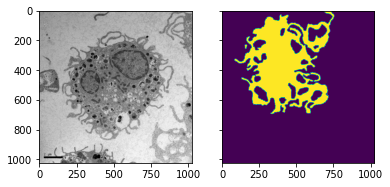

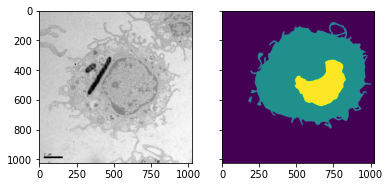

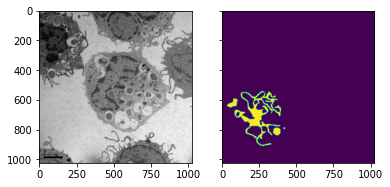

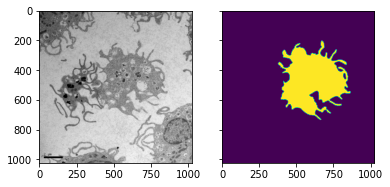

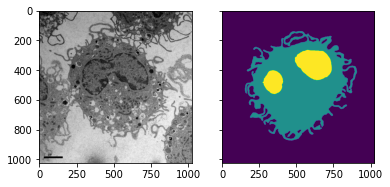

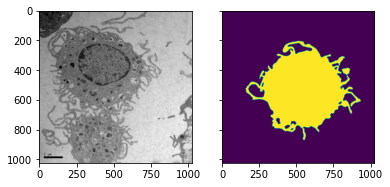

In [45]:
import torchvision.transforms.functional as tf

for check_dataset in train_dataset:

    image, mask = check_dataset
    layer, height, width = (image.size())

    image = tf.to_pil_image(image)  #Convert a tensor or an ndarray to PIL Image

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize = (6,6))
                        
    img1 = ax1.imshow(image, cmap='gray')
    ax1.axis('on')   

    img2 = ax2.imshow(mask)
    ax2.axis('on')        
    plt.show()   